In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    result = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        result[i, sequence] = 1
    
    return result

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [4]:
y_train = np.asarray(test_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



Instructions for updating:
Colocations handled automatically by placer.


In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.6937 - acc: 0.4967 - val_loss: 0.6933 - val_acc: 0.4927
Epoch 2/4
15000/15000 [==============================] - 1s 69us/step - loss: 0.6813 - acc: 0.5772 - val_loss: 0.6967 - val_acc: 0.4973
Epoch 3/4
15000/15000 [==============================] - 1s 64us/step - loss: 0.6381 - acc: 0.6682 - val_loss: 0.7179 - val_acc: 0.4990
Epoch 4/4
15000/15000 [==============================] - 1s 67us/step - loss: 0.5830 - acc: 0.7203 - val_loss: 0.7541 - val_acc: 0.5026


In [8]:
import matplotlib.pyplot as plt
acc = 5
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, acc)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

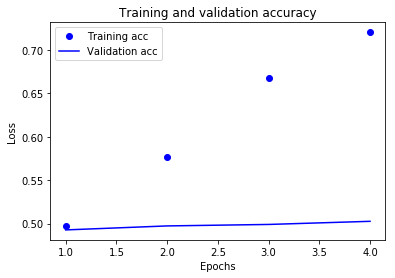

In [9]:
plt.clf()

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()